![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Installing the required libraries

In [1]:
!pip3 install tensorflow keras numpy matplotlib opencv-python

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Emotion Classifier Taipy App for Prediction on User Images

In [2]:
!pip3 install --ignore-installed taipy taipy-gui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 41.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 35.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133

In [57]:
# Imports
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from taipy.gui import Gui, notify

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

In [5]:
# Upload the best ResNet50 model
model_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/ResNet50_Transfer_Learning_40_Epochs.keras"
model = tf.keras.models.load_model(model_path)

In [59]:
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [60]:
# Initialize the face classifier
face_classifier_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/haarcascade_frontalface_default.xml"
face_classifier = cv2.CascadeClassifier(face_classifier_path)

In [61]:
# Function to test Emotion Classifier on local images before deployment using Taipy GUI
def predict_emotion_from_path(image_path):
    """
    Predicts the emotion given the path to an image.

    Args:
        image_path (str): The path to the image file.

    Returns:
        List of tuples: Each tuple contains the coordinates of the face (x, y, w, h) and the predicted emotion.
    """
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    # Detect faces in the image
    faces = face_classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    emotions = []
    for (x, y, w, h) in faces:
        face = image[y:y + h, x:x + w]
        face = cv2.resize(face, (224, 224))
        face = face.astype("float") / 255.0
        face = img_to_array(face)
        face = np.expand_dims(face, axis=0)

        prediction = model.predict(face)[0]
        emotion = emotion_labels[np.argmax(prediction)]
        emotions.append((x, y, w, h, emotion))
    return emotions, image

In [62]:
import matplotlib.pyplot as plt

def display_image_with_emotions(image_path):
    emotions, image = predict_emotion_from_path(image_path)

    for (x, y, w, h, emotion) in emotions:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

1/1 [==============================] - 0s 322ms/step


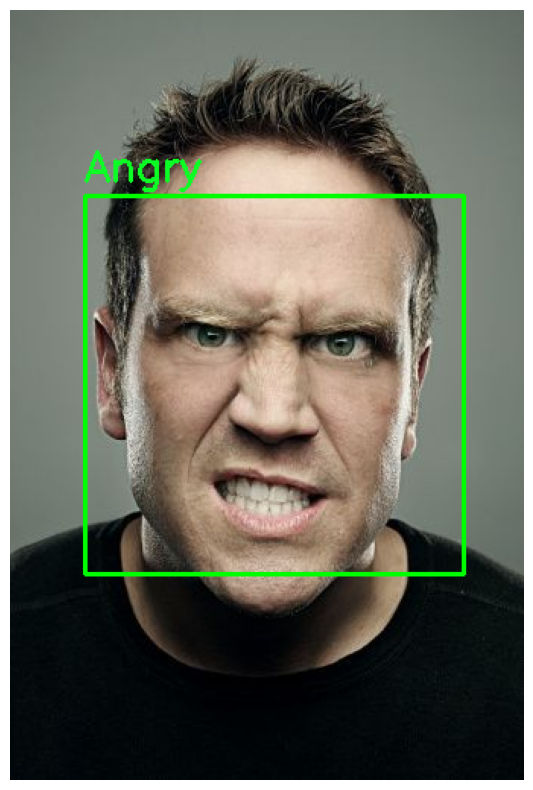

In [78]:
# Test "Angry" expression image
angry_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/angry.jpg"
display_image_with_emotions(angry_image_path)

1/1 [==============================] - 0s 183ms/step


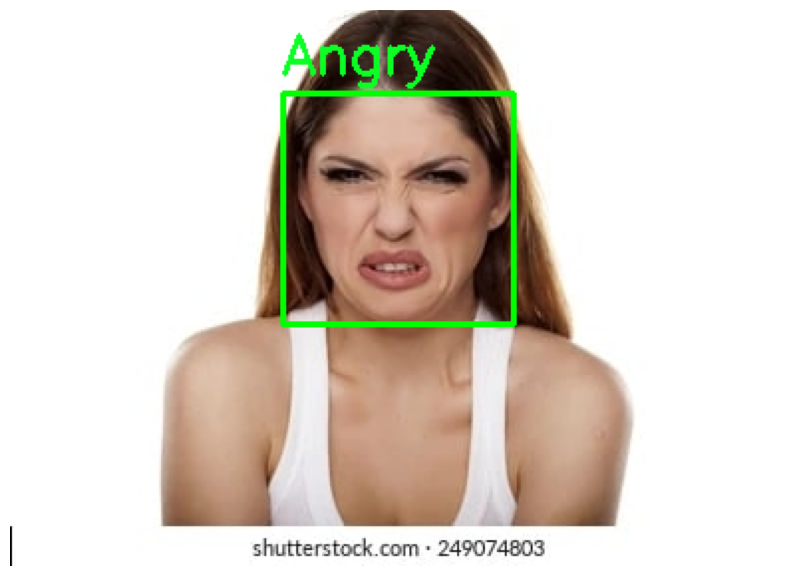

In [79]:
# Test "Disgust" expression image
disgust_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/disgust.jpg"
display_image_with_emotions(disgust_image_path)

1/1 [==============================] - 0s 185ms/step


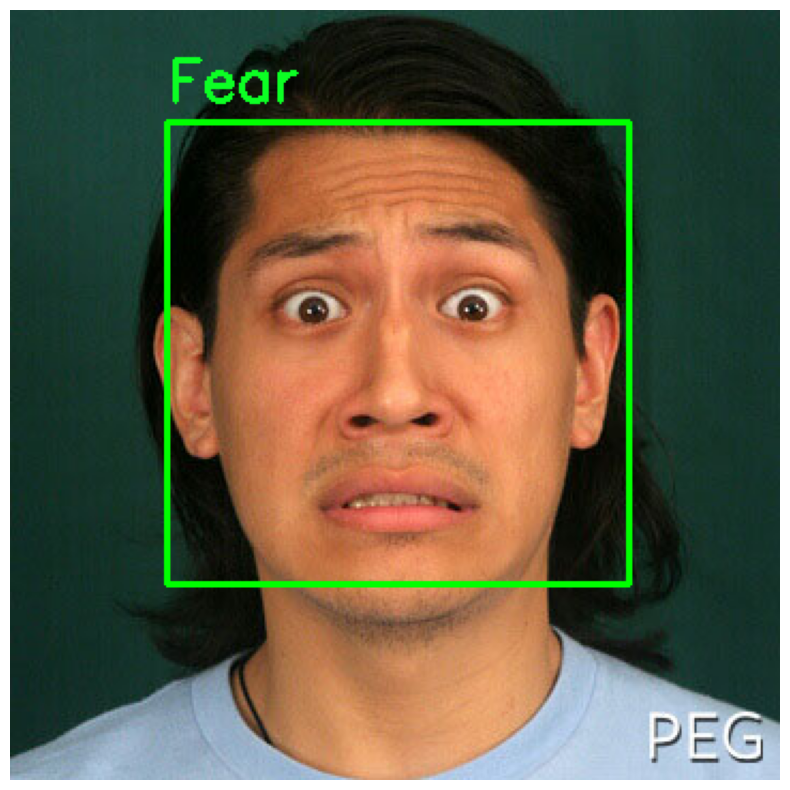

In [80]:
# Test "Fear" expression image
fear_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/fear.jpg"
display_image_with_emotions(fear_image_path)

1/1 [==============================] - 0s 191ms/step


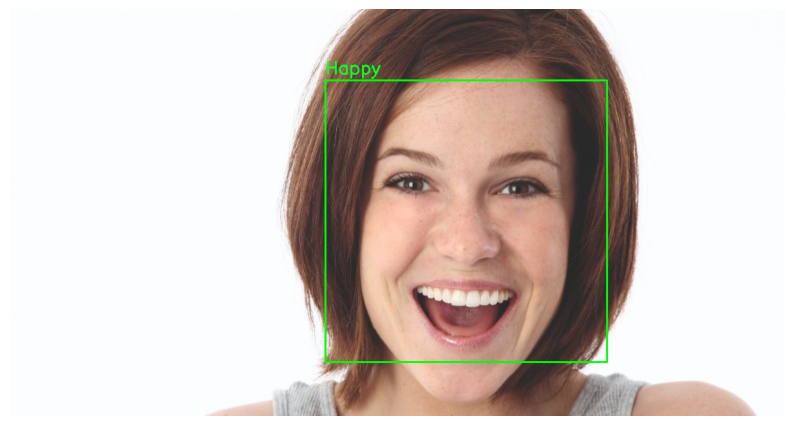

In [81]:
# Test "Happy" expression image
happy_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/happy.jpg"
display_image_with_emotions(happy_image_path)

1/1 [==============================] - 0s 298ms/step


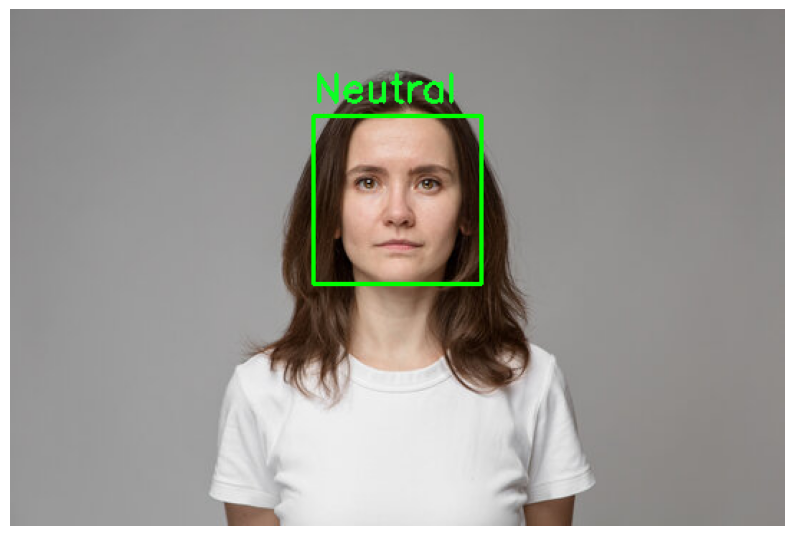

In [82]:
# Test "Neutral" expression image
neutral_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/neutral.jpg"
display_image_with_emotions(neutral_image_path)

1/1 [==============================] - 0s 186ms/step


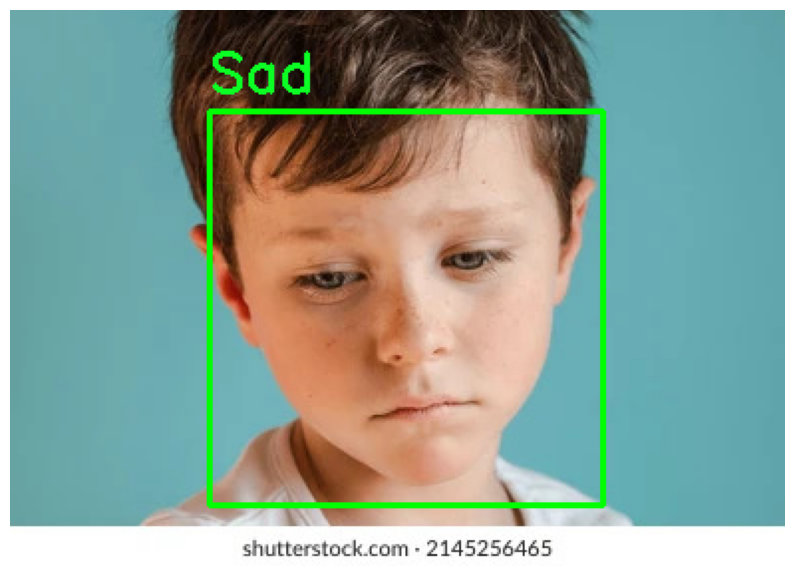

In [83]:
# Test "Sad" expression image
sad_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/sad.jpg"
display_image_with_emotions(sad_image_path)

1/1 [==============================] - 0s 191ms/step


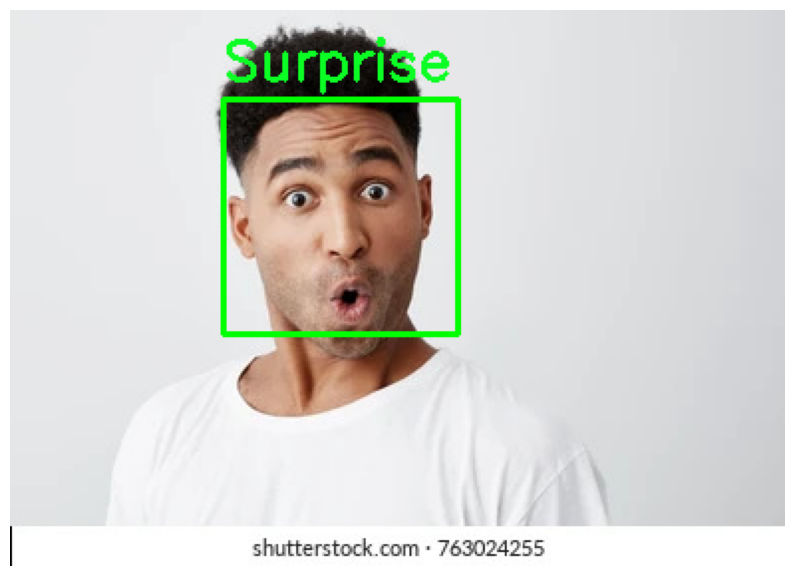

In [84]:
# Test "Surprise" expression image
surprise_image_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/surprise.jpg"
display_image_with_emotions(surprise_image_path)

In [85]:
# Function to predict emotion (to be used in actual Taipy App)
def predict_emotion(image):
    faces = face_classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    emotions = []
    for (x, y, w, h) in faces:
        face = image[y:y + h, x:x + w]
        face = cv2.resize(face, (224, 224))
        face = face.astype("float") / 255.0
        face = img_to_array(face)
        face = np.expand_dims(face, axis=0)

        prediction = model.predict(face)[0]
        emotion = emotion_labels[np.argmax(prediction)]
        emotions.append((x, y, w, h, emotion))
    return emotions

In [86]:
def analyze_image(state):
    if state.image_file:
        nparr = np.frombuffer(state.image_file, np.uint8)
        image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        state.image = image
        state.emotions = predict_emotion(image)
        notify(state, 'image_source', 'render_image')

In [87]:
def render_image(state):
    if state.image is not None:
        image = state.image.copy()
        for (x, y, w, h, emotion) in state.emotions:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
        _, img_encoded = cv2.imencode('.jpg', image)
        return img_encoded.tobytes()
    return None

In [88]:
# Define GUI content
image_content = """
# Emotion Classifier

<|layout|columns=1 1|gap=10px|
<|
<|label|Image Upload|>
<|file|value=image_file|on_change=analyze_image|accept=image/*|label=Upload Image|>

|>
<|
<|image|source=image_source|width=600px|>
|>
|>

"""

In [89]:
# Initialize GUI
state = {
    'image_file': None,
    'image': None,
    'emotions': []
}

gui = Gui(page=image_content)
gui.run(state=state, title="Emotion Classifier App", host="0.0.0.0", port=5000, image_source=render_image)

[2024-06-29 10:54:25][Taipy][INFO] Running in 'single_client' mode in notebook environment


INFO:Taipy:Running in 'single_client' mode in notebook environment


[2024-06-29 10:54:25][Taipy][INFO] Gui server has been stopped.


INFO:Taipy:Gui server has been stopped.


[2024-06-29 10:54:25][Taipy][INFO]  * Server starting on http://localhost:5000


INFO:Taipy: * Server starting on http://localhost:5000
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.
It seems that the gevent monkey-patching is being used.
Please set an environment variable with:
GEVENT_SUPPORT=True
to enable gevent support in the debugger.


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Deployment of Emotion Classifier Taipy App on Render Platform

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Deployment for Real-time Prediction on Webcam Video

We want to run Emotion Classifier on a video and save output with predictions for each frame.

In [ ]:
# Imports
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Upload best ResNet50 model
model_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/ResNet50_Transfer_Learning_40_Epochs.keras"
model = tf.keras.models.load_model(model_path)

In [ ]:
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [ ]:
# Initialize the face classifier
face_classifier_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/haarcascade_frontalface_default.xml"
face_classifier = cv2.CascadeClassifier(face_classifier_path)

In [ ]:
def predict_emotions(video_path, output_path):
  """
  Analyzes a video, predicts emotions for each frame, and saves the output video with annotations.

  Args:
    video_path: The path to the video file.
    output_path: The path to save the output video with annotations.
  """
  # Start capturing video from the provided path
  cap = cv2.VideoCapture(video_path)

  # Get video properties for output video creation
  fps = cap.get(cv2.CAP_PROP_FPS)
  width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

  # Define video writer for output
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec if needed (e.g., 'XVID' for avi output)
  out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

  # Continuous loop for processing video frames
  while True:
    ret, frame = cap.read()
    if not ret:
      break

    # Detect faces in the frame
    faces = face_classifier.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    # Process each face detected
    for (x, y, w, h) in faces:
      # Draw a rectangle around each detected face
      cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
      # Extract the region of interest (ROI) i.e. the face area from the frame
      face = frame[y:y + h, x:x + w]
      # Resize the ROI to the size expected by the model (224x224 pixels in this case)
      face = cv2.resize(face, (224, 224))
      face = face.astype("float") / 255.0  # Normalize pixel values
      face = img_to_array(face)
      face = np.expand_dims(face, axis=0)  # Add batch dimension

      prediction = model.predict(face)[0]
      emotion = emotion_labels[np.argmax(prediction)]
      label_position = (x, y - 10)

      cv2.putText(frame, emotion, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Write the annotated frame to the output video
    out.write(frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

  # Release resources
  cap.release()
  out.release()
  cv2.destroyAllWindows()

In [ ]:
# Prediction on video
video_path = "/gdrive/MyDrive/ancilcleetus-github/My-Learning-Journey/Computer-Vision/02-Computer-Vision-Projects/CV_Project_01_Emotion_Classifier_Keras/Ancil_Cleetus_Emotions_01.mp4"  # video_path = 0 for Webcam video
output_path = "Ancil_Cleetus_Classified_Emotions.mp4"  # Adjust extension based on codec
predict_emotions(video_path, output_path)

1/1 [==============================] - 0s 22ms/step


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Model Retraining

## 1. Need for Model Retraining

Imagine you train a deep learning model to recognize different types of dogs in pictures. It sees thousands of images of poodles, bulldogs, chihuahuas, and so on, and learns to tell them apart. That's great! But what happens if, a year later, a new breed of dog becomes super popular?

Here's where model retraining comes in. It's like teaching your model new tricks. You feed it fresh data with pictures of this new dog breed, and the model adjusts itself to recognize them as well.

Here's why retraining is important for deep learning models:
- **The world changes**: Trends, fashions, even the way people speak can evolve. If your model's data is outdated, it won't understand these changes and its predictions might become inaccurate.
- **New data, new knowledge**: Just like us, deep learning models learn best with more information. Retraining with fresh data keeps your model up-to-date and improves its overall accuracy.

Here's a simple analogy: Imagine a child learning about animals for the first time. They see a dog and a cat, and they learn the difference. But if they only ever see those two animals, they might get confused when they encounter a horse for the first time. By showing them more animals, they can expand their knowledge and become better at identifying different creatures.

Retraining a deep learning model is similar. It's about giving it more information so it can stay relevant and make the best possible predictions.

## 2. When to do Model Retraining ?

There are two main approaches to decide when to retrain a deep learning model:
1. **Scheduled Retraining**:
    - This is like setting a regular checkup for your model. You retrain it at a predefined time interval, like every month or quarter.
    - This is useful when you expect the underlying data to change steadily over time, like customer buying habits or social media trends.
    - **Benefit**: Simple to implement and ensures your model is updated regularly.
    - **Drawback**: Retraining too often can be computationally expensive and unnecessary if the data isn't changing significantly.
2. **Trigger-Based Retraining**:
    - This is more like going to the doctor when you feel sick. You monitor the model's performance and trigger a retrain when it falls below a certain threshold.
    - Performance metrics can be accuracy, error rate, or any measure specific to your task.
    - This is useful when data changes can be unpredictable, or when the cost of retraining is high.
    - **Benefit**: More efficient use of resources, retraining only when truly needed.
    - **Drawback**: Requires setting up monitoring systems and defining clear thresholds for triggering retraining.

Here are some additional factors to consider:
- **Data Drift**: This refers to a change in the underlying data distribution that the model was trained on. For example, if your model is trained on images with good lighting and then encounters many dark photos, its performance might suffer. Data drift can trigger retraining.
- **Concept Drift**: This is a more fundamental change, where the very meaning of what the model is predicting has shifted. For instance, a model trained for spam emails might need retraining if spam tactics evolve significantly.

Ultimately, the best time to retrain your deep learning model depends on your specific application and the trade-off between keeping the model up-to-date and the cost of retraining. It's often a good idea to experiment with both scheduled and trigger-based retraining to find the optimal approach for your needs.

## 3. How to do Model Retraining ?

Retraining a deep learning model involves several steps, but here's a simplified breakdown:
1. **Gather New Data**: This is the fresh information you'll use to update your model. The data should be relevant to your task and address any potential data drift or concept drift. Ensure the new data is high-quality and properly formatted for your model.

2. **Prepare the Data**: Depending on your framework and setup, you might need to pre-process the new data. This could involve cleaning, normalization, or any other transformations you applied to the original training data.

3. **Load the Model**: Use your deep learning framework (TensorFlow, PyTorch, etc.) to load the previously trained model. This serves as the starting point for retraining.

4. **Define the Retraining Process**: Here, you specify how much of the original model to keep and how much to update with the new data. There are different approaches, but a common technique is to freeze the initial layers (which contain more general features) and retrain the later layers (which handle more specific details) on the new data.

5. **Retrain the Model**:  This involves feeding the new data to the model and adjusting its internal parameters to improve its performance on the updated task. You'll likely use the same optimization algorithms you used for initial training.

6. **Evaluate the Retrained Model**:  Don't just assume retraining worked!  Test the retrained model on a separate dataset to see if its performance has improved on the task you care about. You might need to adjust the retraining process or data selection if the results aren't satisfactory.

7. **Deployment**: Once you're happy with the retrained model's performance, you can deploy it back into production to make predictions on new data.

## 4. A/B Testing

A/B Testing is a controlled experiment where you compare two or more versions of something (like a website layout or a machine learning model) to see which one performs better. In the context of machine learning, you might compare a new, retrained model against the currently deployed model.

Once you've retrained your model, you can use A/B testing to compare its performance against the original model in a real-world setting. This allows you to validate the effectiveness of the retraining process before fully deploying the new model.

Lets say our deployed model is serving 100K users. We have retrained a new model and want to validate the effectiveness of this model.

In A/B Testing, our Retrained Model is initially exposed to a small subset, say 10K users while remaining 90K users are still using the deployed model. If we get positive feedback from 10K users, we increase the user base of retrained model to 20K. If we get positive feedback again, we increase user base to 30K and so on until all 100K users are exposed to the retrained model. If we get negative feedback during any of the above stages, we revert to our old deployed model. Then, we update the retraining process and retrain the model again such that it won't get negative feedback. Once all 100K users are satisfied with the newly retrained model, we replace the old model with the new one.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)